<a href="https://colab.research.google.com/github/iam-fern/Generate_addition_4X/blob/main/GQtest_cluster_data(y_hat)_add_delta_(3_6)_n250_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_addition_4X/addition_delta_3.6'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_3.6_n250.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,85.502962,64.614808,29.925242,21.670740,1121.001856,1332.715608,516.815575,815.900033
1,0.0,1.0,79.287148,27.708449,60.291490,41.898042,-470.438773,-251.253644,456.627631,-707.881275
2,0.0,2.0,26.089637,20.790467,59.010865,46.118061,127.861748,289.870779,-96.482309,386.353088
3,0.0,3.0,29.005762,52.677918,48.809704,54.672324,2583.143706,2778.309414,-90.276575,2868.585989
4,0.0,4.0,85.111521,78.385105,30.527257,25.217876,-758.618797,-529.377037,529.431780,-1058.808817
...,...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,88.720098,36.321211,44.579246,40.889687,679.297817,899.808059,313.776056,586.032003
249996,999.0,246.0,74.327569,48.745846,80.109071,61.057430,698.220735,972.460651,370.929381,601.531270
249997,999.0,247.0,64.178483,35.870721,71.634502,59.202917,-260.134981,-19.248358,331.030452,-350.278810
249998,999.0,248.0,77.573423,69.906590,75.362877,52.048550,-220.704185,64.187255,496.228555,-432.041300


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3         x4            e  \
rep   index                                                            
0.0   0.0    85.502962  64.614808  29.925242  21.670740  1121.001856   
      1.0    79.287148  27.708449  60.291490  41.898042  -470.438773   
      2.0    26.089637  20.790467  59.010865  46.118061   127.861748   
      3.0    29.005762  52.677918  48.809704  54.672324  2583.143706   
      4.0    85.111521  78.385105  30.527257  25.217876  -758.618797   
...                ...        ...        ...        ...          ...   
999.0 245.0  88.720098  36.321211  44.579246  40.889687   679.297817   
      246.0  74.327569  48.745846  80.109071  61.057430   698.220735   
      247.0  64.178483  35.870721  71.634502  59.202917  -260.134981   
      248.0  77.573423  69.906590  75.362877  52.048550  -220.704185   
      249.0  86.437314  41.722422  78.583349  40.859514  2655.155899   

                       Y       y_hat        e_hat  
rep   index                                        
0.0   0.0    1332.715608  516.815575   815.900033  
      1.0    -251.253644  456.627631  -707.881275  
      2.0     289.870779  -96.482309   386.353088  
      3.0    2778.309414  -90.276575  2868.585989  
      4.0    -529.377037  529.431780 -1058.808817  
...                  ...         ...          ...  
999.0 245.0   899.808059  313.776056   586.032003  
      246.0   972.460651  370.929381   601.531270  
      247.0   -19.248358  331.030452  -350.278810  
      248.0    64.187255  496.228555  -432.041300  
      249.0  2912.758498  426.292672  2486.465826  

[250000 rows x 8 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3         x4            e  \
rep   index                                                            
0.0   0.0    85.502962  64.614808  29.925242  21.670740  1121.001856   
      1.0    79.287148  27.708449  60.291490  41.898042  -470.438773   
      2.0    26.089637  20.790467  59.010865  46.118061   127.861748   
      3.0    29.005762  52.677918  48.809704  54.672324  2583.143706   
      4.0    85.111521  78.385105  30.527257  25.217876  -758.618797   
...                ...        ...        ...        ...          ...   
999.0 245.0  88.720098  36.321211  44.579246  40.889687   679.297817   
      246.0  74.327569  48.745846  80.109071  61.057430   698.220735   
      247.0  64.178483  35.870721  71.634502  59.202917  -260.134981   
      248.0  77.573423  69.906590  75.362877  52.048550  -220.704185   
      249.0  86.437314  41.722422  78.583349  40.859514  2655.155899   

                       Y       y_hat        e_hat  
rep   index                                        
0.0   0.0    1332.715608  516.815575   815.900033  
      1.0    -251.253644  456.627631  -707.881275  
      2.0     289.870779  -96.482309   386.353088  
      3.0    2778.309414  -90.276575  2868.585989  
      4.0    -529.377037  529.431780 -1058.808817  
...                  ...         ...          ...  
999.0 245.0   899.808059  313.776056   586.032003  
      246.0   972.460651  370.929381   601.531270  
      247.0   -19.248358  331.030452  -350.278810  
      248.0    64.187255  496.228555  -432.041300  
      249.0  2912.758498  426.292672  2486.465826  

[250000 rows x 8 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,85.502962,64.614808,29.925242,21.670740,1121.001856,1332.715608,516.815575,815.900033
1,0.0,1.0,79.287148,27.708449,60.291490,41.898042,-470.438773,-251.253644,456.627631,-707.881275
2,0.0,2.0,26.089637,20.790467,59.010865,46.118061,127.861748,289.870779,-96.482309,386.353088
3,0.0,3.0,29.005762,52.677918,48.809704,54.672324,2583.143706,2778.309414,-90.276575,2868.585989
4,0.0,4.0,85.111521,78.385105,30.527257,25.217876,-758.618797,-529.377037,529.431780,-1058.808817
...,...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,88.720098,36.321211,44.579246,40.889687,679.297817,899.808059,313.776056,586.032003
249996,999.0,246.0,74.327569,48.745846,80.109071,61.057430,698.220735,972.460651,370.929381,601.531270
249997,999.0,247.0,64.178483,35.870721,71.634502,59.202917,-260.134981,-19.248358,331.030452,-350.278810
249998,999.0,248.0,77.573423,69.906590,75.362877,52.048550,-220.704185,64.187255,496.228555,-432.041300


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1         x2         x3         x4            e  \
rep   index                                                            
0.0   0.0    85.502962  64.614808  29.925242  21.670740  1121.001856   
      1.0    79.287148  27.708449  60.291490  41.898042  -470.438773   
      2.0    26.089637  20.790467  59.010865  46.118061   127.861748   
      3.0    29.005762  52.677918  48.809704  54.672324  2583.143706   
      4.0    85.111521  78.385105  30.527257  25.217876  -758.618797   
...                ...        ...        ...        ...          ...   
999.0 245.0  88.720098  36.321211  44.579246  40.889687   679.297817   
      246.0  74.327569  48.745846  80.109071  61.057430   698.220735   
      247.0  64.178483  35.870721  71.634502  59.202917  -260.134981   
      248.0  77.573423  69.906590  75.362877  52.048550  -220.704185   
      249.0  86.437314  41.722422  78.583349  40.859514  2655.155899   

                       Y       y_hat        e_hat  
rep   index                                        
0.0   0.0    1332.715608  516.815575   815.900033  
      1.0    -251.253644  456.627631  -707.881275  
      2.0     289.870779  -96.482309   386.353088  
      3.0    2778.309414  -90.276575  2868.585989  
      4.0    -529.377037  529.431780 -1058.808817  
...                  ...         ...          ...  
999.0 245.0   899.808059  313.776056   586.032003  
      246.0   972.460651  370.929381   601.531270  
      247.0   -19.248358  331.030452  -350.278810  
      248.0    64.187255  496.228555  -432.041300  
      249.0  2912.758498  426.292672  2486.465826  

[250000 rows x 8 columns]

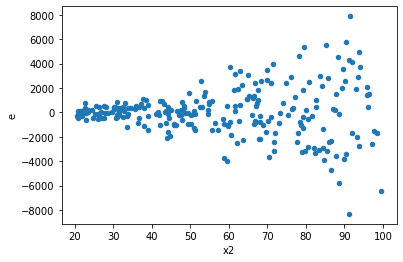

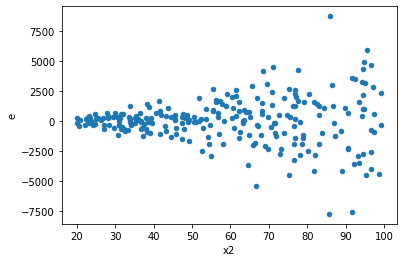

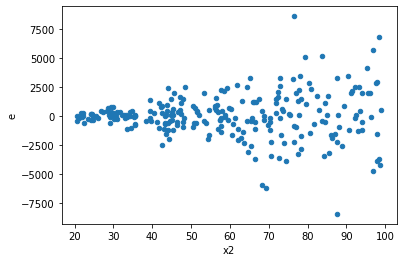

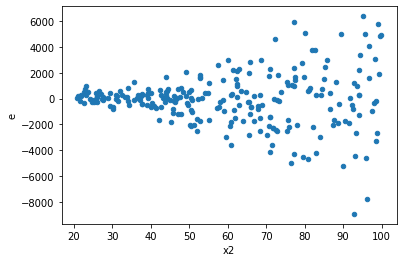

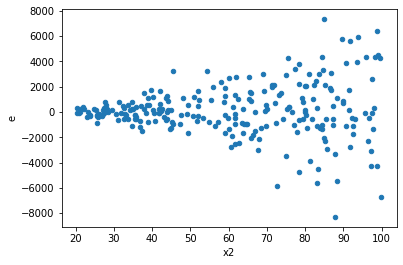

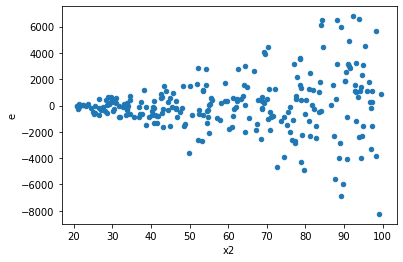

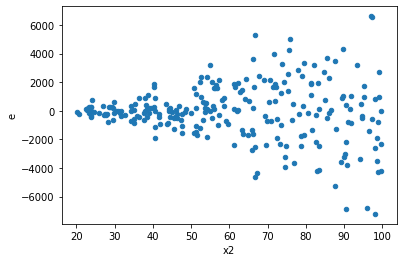

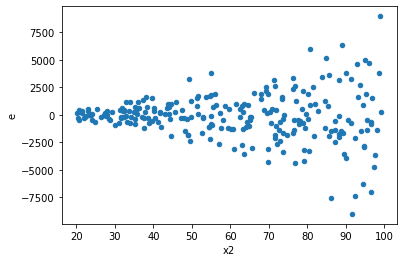

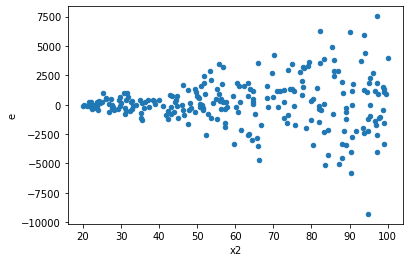

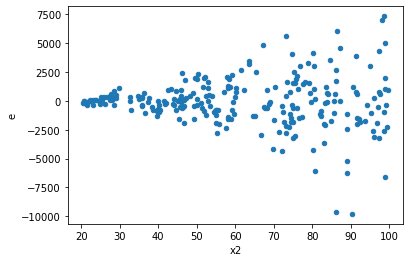

In [11]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["y_hat"]]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2', 'x3', 'x4']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2', 'x3', 'x4']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,110.0,132.0,427542754.96172965,539574203.1491836,3886752.317833906,4087683.357190785,1.0516963837481823,0.7785263242268332,0.6107368378865834,0.3892631621134166,Reject005=1 : Homoscedasticity
2.0,116.0,126.0,345304449.06131345,509424699.0957537,2976762.4919078746,4043053.167426617,1.3582048209816473,0.09261409507739438,0.9536929524613028,0.04630704753869719,Reject005=1 : Homoscedasticity
3.0,128.0,114.0,501942463.1679105,510036637.4854439,3921425.493499301,4474005.591977578,1.1409130683202602,0.4729687142399084,0.7635156428800458,0.2364843571199542,Reject005=1 : Homoscedasticity
9.0,143.0,99.0,487854994.6298675,546524747.5695229,3411573.3890200523,5520451.995651746,1.6181542549895,0.011159439658758652,0.9944202801706207,0.005579719829379326,Reject005=0 : Heteroscedasticity
16.0,118.0,124.0,94494487.69075057,770298224.4552746,800800.743141954,6212082.455284473,7.757338524576379,2.220446049250313e-16,0.9999999999999999,1.1102230246251565e-16,Reject005=0 : Heteroscedasticity
17.0,114.0,128.0,391082701.4797095,648019241.9183217,3430550.012979908,5062650.3274868885,1.4757547064848868,0.03257836707457251,0.9837108164627137,0.016289183537286256,Reject005=0 : Heteroscedasticity
18.0,154.0,88.0,356028542.8979135,749360791.3740852,2311873.6551812566,8515463.538341878,3.6833602559800114,2.7043633998857786e-10,0.9999999998647818,1.3521816999428893e-10,Reject005=0 : Heteroscedasticity
20.0,130.0,112.0,393874811.9074217,707301769.0377821,3029806.2454417055,6315194.366408768,2.084355848137113,8.245172617749041e-05,0.9999587741369113,4.122586308874521e-05,Reject005=0 : Heteroscedasticity
22.0,121.0,121.0,293069636.9033968,531933550.4081453,2422063.1149041057,4396145.0446954155,1.815041489895059,0.001161665071111262,0.9994191674644444,0.000580832535555631,Reject005=0 : Heteroscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,110.0,132.0,427542754.96172965,539574203.1491836,3886752.317833906,4087683.357190785,1.0516963837481823,0.7785263242268332,Reject005=1 : Homoscedasticity
1.0,122.0,120.0,451155481.09038514,432684862.9410822,3697995.746642501,3605707.191175685,0.9750436285518697,0.8892805000814298,Reject005=1 : Homoscedasticity
2.0,116.0,126.0,345304449.06131345,509424699.0957537,2976762.4919078746,4043053.167426617,1.3582048209816473,0.09261409507739438,Reject005=1 : Homoscedasticity
3.0,128.0,114.0,501942463.1679105,510036637.4854439,3921425.493499301,4474005.591977578,1.1409130683202602,0.4729687142399084,Reject005=1 : Homoscedasticity
4.0,140.0,102.0,847950709.4535576,159663397.5706214,6056790.781811126,1565327.4271629548,0.25844171997218707,2.2827093129393006e-13,Reject005=0 : Heteroscedasticity
5.0,122.0,120.0,981188202.9267517,130176273.94705021,8042526.253497965,1084802.2828920851,0.1348832753166666,1.0171228960322375e-24,Reject005=0 : Heteroscedasticity
6.0,122.0,120.0,635150435.4660782,313370506.6549812,5206151.11037769,2611420.88879151,0.5016029756773732,0.0001738878604431298,Reject005=0 : Heteroscedasticity
7.0,134.0,108.0,623800235.4720747,480800231.1900634,4655225.637851304,4451853.992500587,0.9563132571497466,0.8022029319708472,Reject005=1 : Homoscedasticity
8.0,112.0,130.0,796476681.5914557,236727019.86935285,7111398.942780854,1820977.075918099,0.25606453674866125,1.402862065744257e-12,Reject005=0 : Heteroscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject005=0 : Heteroscedasticity    719
Reject005=1 : Homoscedasticity      281
Name: Result_test, dtype: int64